In [1]:
!pip install kneed

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

C:\Users\Enric\anaconda3\python.exe
3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=9, micro=13, releaselevel='final', serial=0)


In [3]:
path = "H:\\Dropbox\\Personale\\Ricerca\\Clustering_Project_with_Notre_Dame\\Datasets\\"
name = "UnsupervisedDataLamb0.4.npy"

In [4]:
array = np.load(path+name)
print(type(array))

<class 'numpy.ndarray'>


In [5]:
# Create the dataframe
df = pd.DataFrame(np.transpose(array))
df.to_csv('UnsupervisedDataLamb0.4.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23006 entries, 0 to 23005
Columns: 750 entries, 0 to 749
dtypes: float64(750)
memory usage: 131.6 MB


In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,740,741,742,743,744,745,746,747,748,749
0,0.998509,0.054578,0.001000,0.000173,0.000004,3.583409e-07,2.009087e-07,7.239799e-08,1.564827e-08,1.464199e-08,...,9.977105e-17,9.977105e-17,9.977105e-17,9.977105e-17,9.977105e-17,9.977105e-17,9.977105e-17,9.977105e-17,9.977105e-17,9.977105e-17
1,0.998459,0.053303,0.015237,0.002503,0.000007,2.936841e-06,1.521340e-07,1.299256e-07,6.462215e-08,6.266699e-08,...,9.955073e-17,9.955073e-17,9.955073e-17,9.955073e-17,9.955073e-17,9.955073e-17,9.955073e-17,9.955073e-17,9.955073e-17,9.955073e-17
2,0.998498,0.054735,0.002339,0.000127,0.000030,1.120211e-06,5.554875e-07,2.983853e-07,2.256081e-07,1.006055e-07,...,9.977001e-17,9.977001e-17,9.977001e-17,9.977001e-17,9.977001e-17,9.977001e-17,9.977001e-17,9.977001e-17,9.977001e-17,9.977001e-17
3,0.998455,0.053252,0.015663,0.002568,0.000083,9.155879e-06,2.621441e-06,2.147018e-06,1.136417e-06,2.931042e-07,...,9.976569e-17,9.976569e-17,9.976569e-17,9.976569e-17,9.976569e-17,9.976569e-17,9.976569e-17,9.976569e-17,9.976569e-17,9.976569e-17
4,0.998455,0.053252,0.015670,0.002568,0.000086,9.267410e-06,2.277068e-06,1.192599e-06,3.856189e-07,3.020026e-07,...,8.400737e-17,8.400737e-17,8.400737e-17,8.400737e-17,8.400737e-17,8.400737e-17,8.400737e-17,8.400737e-17,8.400737e-17,8.400737e-17


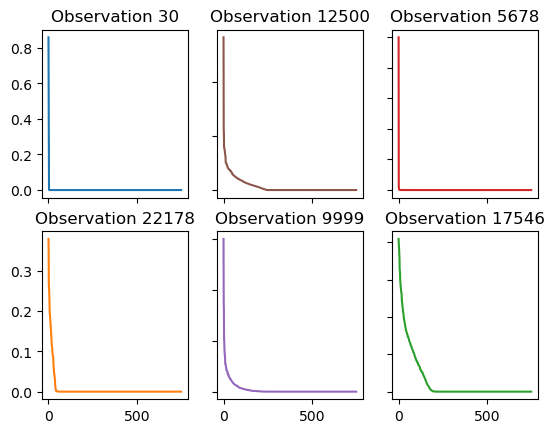

In [8]:
# plotting the points
x = range(0, 750)
y = [30, 12500, 5678, 22178, 9999, 17546]
fig, axs = plt.subplots(2, 3)

axs[0, 0].plot(x, df.iloc[y[0]])
label = 'Observation '+ str(y[0])
axs[0, 0].set_title(label)

axs[0, 1].plot(x, df.iloc[y[1]], 'tab:brown')
label = 'Observation '+ str(y[1])
axs[0, 1].set_title(label)

axs[0, 2].plot(x, df.iloc[y[2]], 'tab:red')
label = 'Observation '+ str(y[2])
axs[0, 2].set_title(label)

axs[1, 0].plot(x, df.iloc[y[3]], 'tab:orange')
label = 'Observation '+ str(y[3])
axs[1, 0].set_title(label)

axs[1, 1].plot(x, df.iloc[y[4]], 'tab:purple')
label = 'Observation '+ str(y[4])
axs[1, 1].set_title(label)

axs[1, 2].plot(x, df.iloc[y[5]], 'tab:green')
label = 'Observation '+ str(y[5])
axs[1, 2].set_title(label)



# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
     ax.label_outer()
        

In [9]:
from sklearn.model_selection import train_test_split
train_X, test_X = train_test_split(df, test_size=0.2, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

In [11]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [12]:
pca = PCA()
pca.fit_transform(data_scaled)
# PCA features
features = range(pca.n_components_)
# PCA transformed data
data_pca = pca.transform(data_scaled)
pca.explained_variance_ratio_

array([7.05145036e-01, 2.11964223e-01, 4.06683330e-02, 1.34672995e-02,
       7.60244739e-03, 5.45390604e-03, 3.22399300e-03, 2.21591015e-03,
       1.71217026e-03, 1.40778412e-03, 1.10237293e-03, 8.92174311e-04,
       6.93339851e-04, 5.80866633e-04, 4.91514466e-04, 3.81445188e-04,
       3.35408207e-04, 2.56429186e-04, 2.29422716e-04, 1.88348471e-04,
       1.65548737e-04, 1.44973427e-04, 1.14780413e-04, 1.11033738e-04,
       1.03005066e-04, 8.98694861e-05, 8.20337819e-05, 7.49403410e-05,
       7.01756360e-05, 6.36634029e-05, 5.54837773e-05, 5.24145506e-05,
       4.59008734e-05, 4.36930722e-05, 3.95545331e-05, 3.58468655e-05,
       3.40913999e-05, 3.05485436e-05, 2.89635684e-05, 2.66277132e-05,
       2.41571384e-05, 2.37696480e-05, 2.36623149e-05, 2.07139464e-05,
       1.98574595e-05, 1.86784531e-05, 1.71454295e-05, 1.64219729e-05,
       1.49348799e-05, 1.45305330e-05, 1.34909892e-05, 1.26094249e-05,
       1.22119116e-05, 1.11739317e-05, 1.07416484e-05, 1.03167366e-05,
      

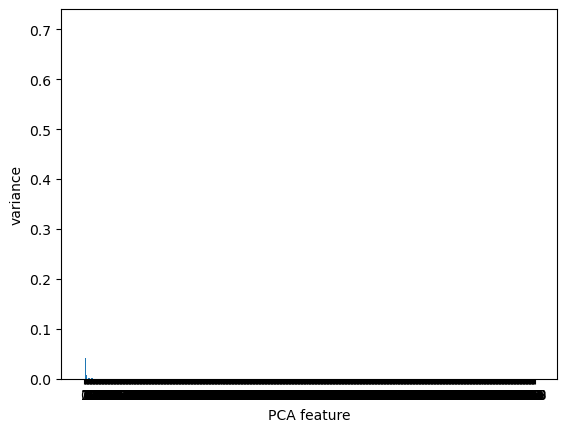

In [13]:
plt.bar(features, pca.explained_variance_ratio_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

In [14]:
# Principal component analysis (PCA) and singular value decomposition (SVD) 
# PCA and SVD are closely related approaches and can be both applied to decompose any rectangular matrices.
pca2 = PCA(n_components=2, svd_solver='full')
# fit PCA
pca2.fit(data_scaled)

# PCA transformed data
data_pca2 = pca2.transform(data_scaled)
print(data_pca2.shape)


(23006, 2)


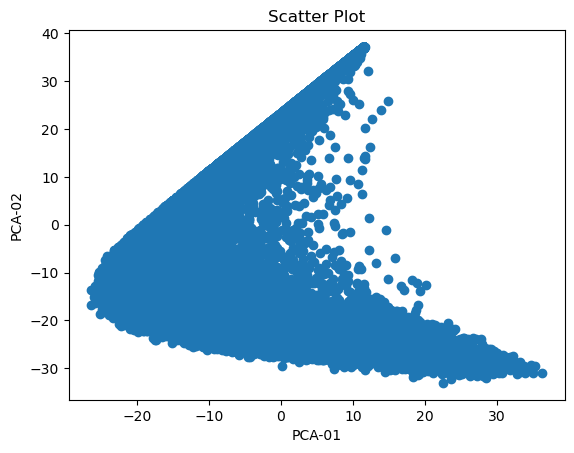

In [15]:
xs = data_pca2[:,0]
ys = data_pca2[:,1]
plt.scatter(ys, xs)

plt.grid(False)
plt.title('Scatter Plot')
plt.xlabel('PCA-01')
plt.ylabel('PCA-02')

plt.show()

In [16]:
#  finding elbow value for different number of clusters.
X = data_pca2
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++',random_state= 42 ) )
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)   

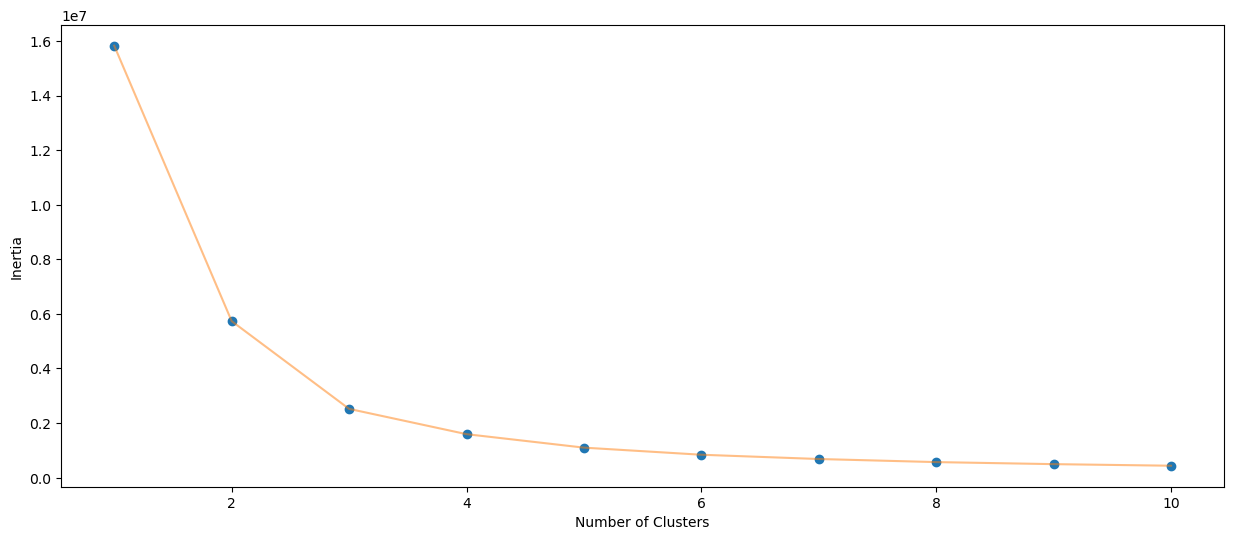

In [17]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [18]:
# KMeans model
# 5 clusters to start with
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)

In [19]:
from sklearn.pipeline import make_pipeline 
# Build pipeline
pipeline = make_pipeline(scaler, pca2, kmeans)
# fit the model to the scaled dataset
model_fit = pipeline.fit(df)
model_fit

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2, svd_solver='full')),
                ('kmeans', KMeans(n_clusters=3, random_state=0))])

In [20]:
# return a label for each data point based on their cluster
labels = model_fit.predict(df)


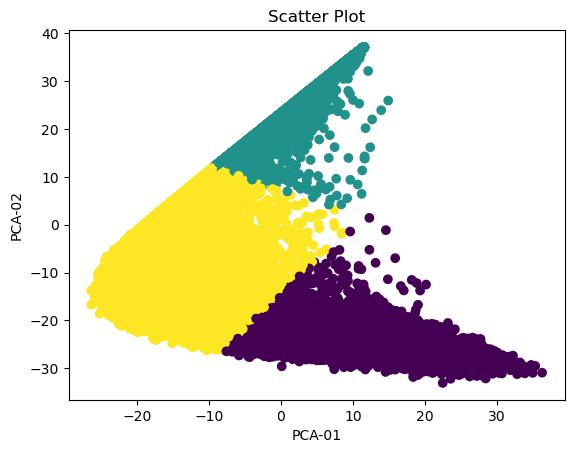

In [21]:
# Scatter plot visuals with labels

xs = data_pca2[:,0]
ys = data_pca2[:,1]
#zs = train_X.iloc[:,2]
plt.scatter(ys, xs,c=labels)
#plt.scatter(ys, zs, c=labels)

plt.grid(False)
plt.title('Scatter Plot')
plt.xlabel('PCA-01')
plt.ylabel('PCA-02')

plt.show()

# DBSCAN

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score
from sklearn.neighbors import NearestNeighbors

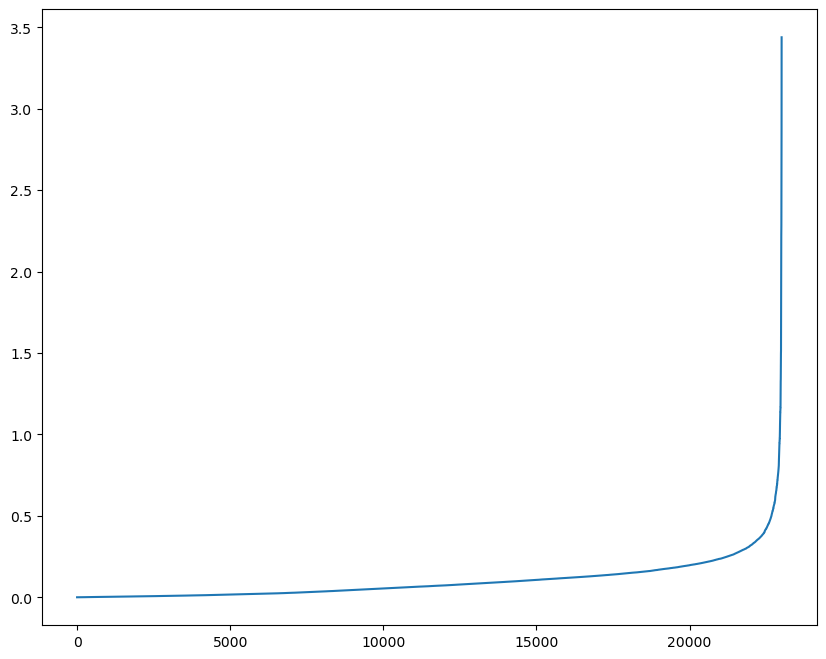

In [55]:
nn = NearestNeighbors(n_neighbors=20).fit(data_pca2)
distances, indices = nn.kneighbors(data_pca2)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,8))
plt.plot(distances)

In [57]:
min_samples = range(10,21)
eps = np.arange(0.05,0.13, 0.01) # returns array of ranging from 0.05 to 0.13 with step of 0.01
output = []

for ms in min_samples:
    for ep in eps:
        labels = DBSCAN(min_samples=ms, eps = ep).fit(data_pca2).labels_
        score = silhouette_score(data_pca2, labels)
        output.append((ms, ep, score))
        

In [58]:
min_samples, eps, score = sorted(output, key=lambda x:x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"min_samples: {min_samples}")
print(f"eps: {eps}")

Best silhouette_score: 0.1637717439651498
min_samples: 16
eps: 0.12000000000000001


In [59]:
db = DBSCAN(eps=0.122, min_samples=16).fit(data_pca2)
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print("number of clusters in pca-DBSCAN: ", n_clusters_)

number of clusters in pca-DBSCAN:  12


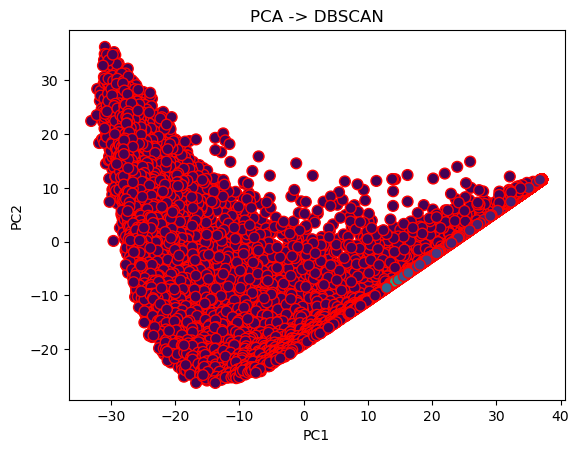

In [60]:
plt.scatter(data_pca2[:,0], data_pca2[:,1], c=labels, s=60, edgecolors='red')
plt.title('PCA -> DBSCAN')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [46]:
# Number of Clusters
labels=dbscanModel.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)


Estimated no. of clusters: 63


In [36]:

# Identify Noise
n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

C:\Users\Enric\anaconda3\lib\site-packages\seaborn\_core.py:882: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  val in data


ValueError: Could not interpret value `LENGTH` for parameter `x`

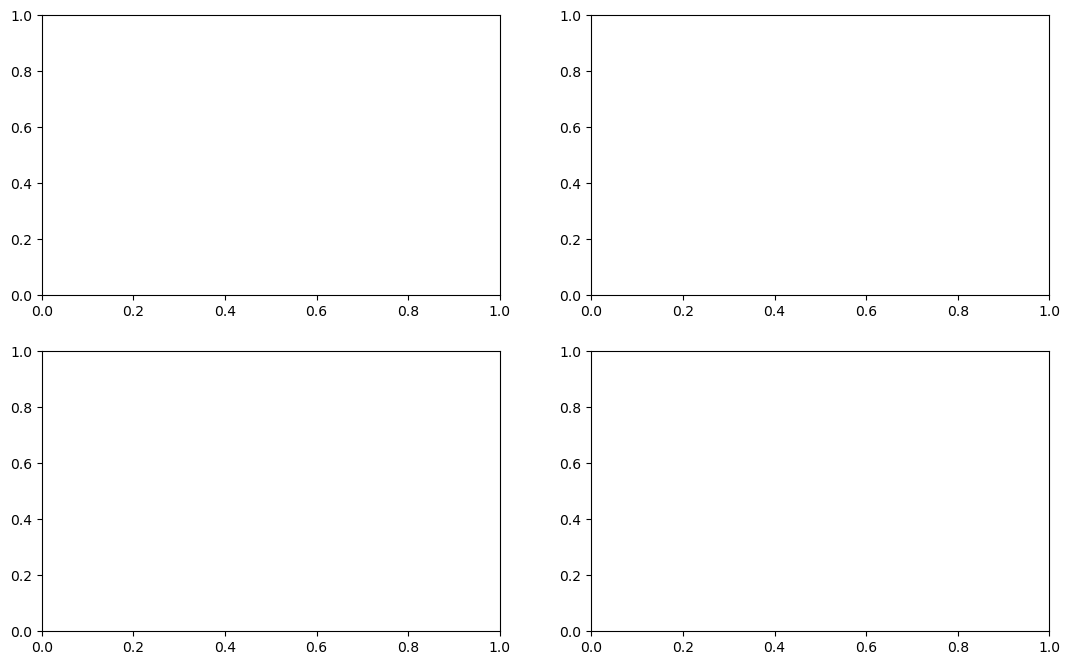

In [37]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (13,8))

sns.scatterplot(x = "LENGTH", y = "ASYMMETRY", data = X, hue = "LABEL", palette = "Accent", ax = ax1)


plt.tight_layout()
plt.show()